# **K-NEAREST NEIGHBOURS**

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
df = pd.read_csv('/content/Zoo.csv')
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [53]:
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [54]:
df.dtypes

,0
animal name,object
hair,int64
feathers,int64
eggs,int64
milk,int64
airborne,int64
aquatic,int64
predator,int64
toothed,int64
backbone,int64


In [55]:
df.isnull().sum()

,0
animal name,0
hair,0
feathers,0
eggs,0
milk,0
airborne,0
aquatic,0
predator,0
toothed,0
backbone,0


## **1. Analyse the data using the visualizations**

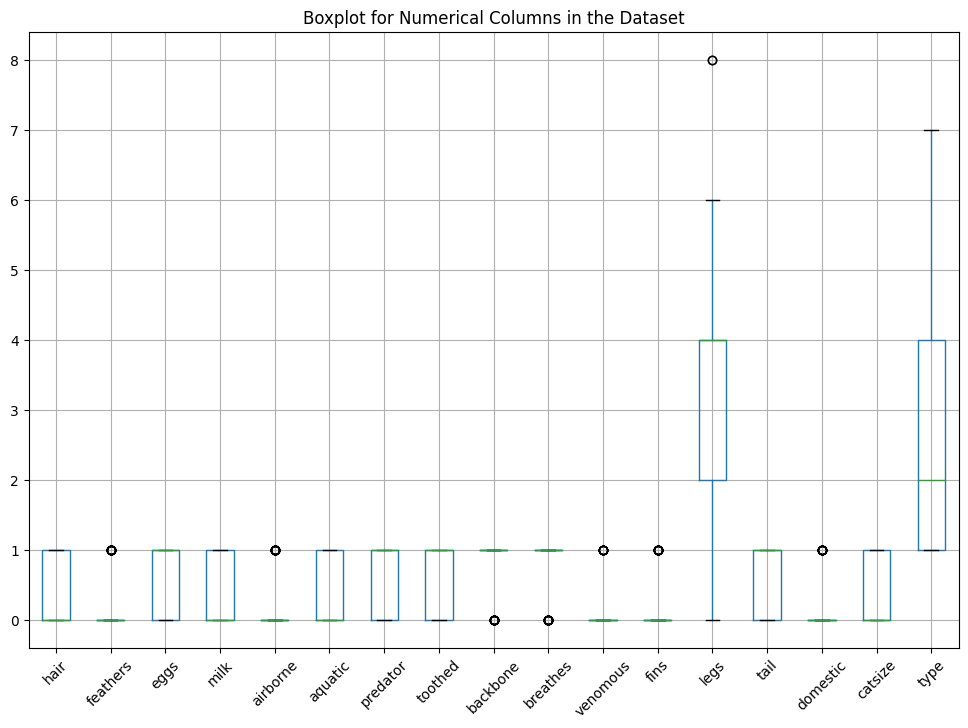

In [56]:
# Plotting boxplot for numerical columns
df_numerical = df.select_dtypes(include=['int64'])
plt.figure(figsize=(12, 8))
df_numerical.boxplot()
plt.xticks(rotation=45)
plt.title("Boxplot for Numerical Columns in the Dataset")
plt.show()

In [57]:
df_numerical = df.select_dtypes(include=['int64'])
num_columns = df_numerical.columns

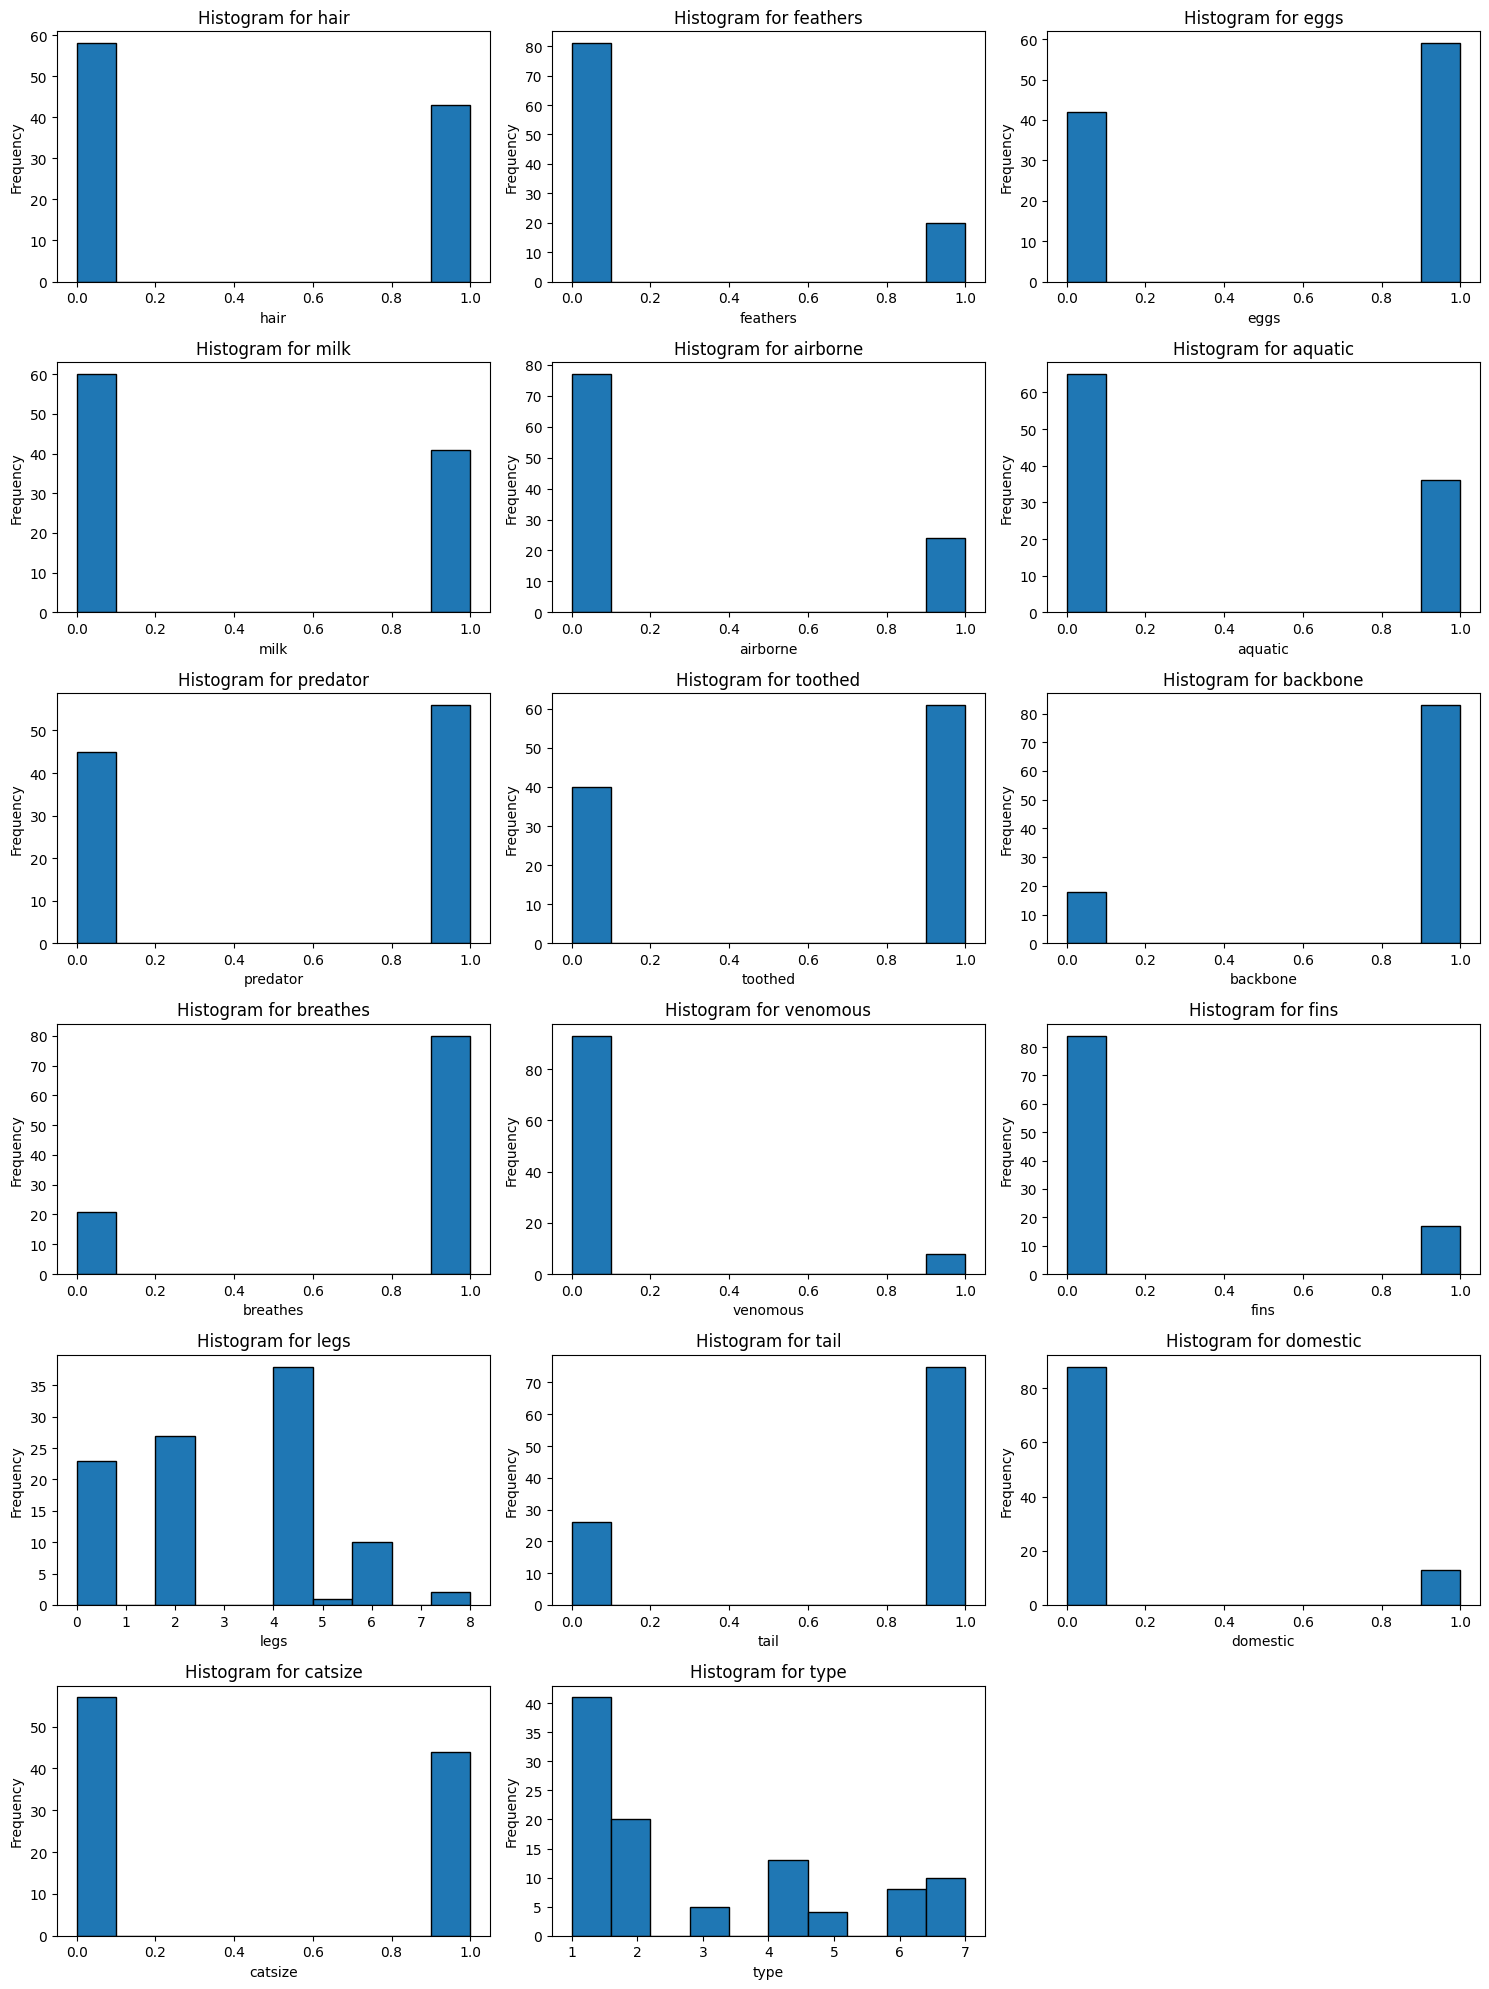

In [58]:
# Plotting separate histograms for each numerical column
plt.figure(figsize=(15, 20))

for i, col in enumerate(num_columns, 1):
    plt.subplot(6, 3, i)
    df_numerical[col].hist(bins=10, edgecolor='black')
    plt.title(f"Histogram for {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.grid(False)

plt.tight_layout()
plt.show()

## **2. Preprocess the data by handling missing values & Outliers, if any.**

In [59]:
# Define a function to cap outliers
def cap_outliers(df):
    # List of numeric columns
    numeric_cols = df.select_dtypes(include=[np.number]).columns

    for col in numeric_cols:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        # Define the outlier boundaries
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Cap outliers
        df[col] = np.where(df[col] > upper_bound, upper_bound,
                  np.where(df[col] < lower_bound, lower_bound, df[col]))

    return df

In [60]:
# Apply the function
df_capped = cap_outliers(df)

In [61]:
df_capped

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,4.0,0.0,0.0,1.0,1.0
1,antelope,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,4.0,1.0,0.0,1.0,1.0
2,bass,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0
3,bear,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,4.0,0.0,0.0,1.0,1.0
4,boar,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,4.0,1.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,2.0,1.0,0.0,1.0,1.0
97,wasp,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,6.0,0.0,0.0,0.0,6.0
98,wolf,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,4.0,1.0,0.0,1.0,1.0
99,worm,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0


## **3. Split the dataset into training and testing sets (80% training, 20% testing).**

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
df = df_capped

In [64]:
# Splitting the dataset
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

In [65]:
# Display the sizes of the splits
print(f"Training set size: {len(train_df)}")
print(f"Testing set size: {len(test_df)}")

Training set size: 80
Testing set size: 21


## **4. Implement the K-Nearest Neighbours algorithm using a machine learning library like scikit-learn On training dataset**

In [66]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [67]:
# 'type' is the target variable
X_train = train_df.drop(['animal name','type'], axis=1)
y_train = train_df['type']

X_test = test_df.drop(['animal name','type'], axis=1)
y_test = test_df['type']

In [68]:
# Initialize the KNN classifier with a chosen number of neighbors
knn = KNeighborsClassifier(n_neighbors=3)

In [69]:
# Train the model
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [70]:
# Make predictions on the test set
y_pred = knn.predict(X_test)

In [71]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Detailed classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9523809523809523
Classification Report:
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        12
         2.0       1.00      1.00      1.00         2
         3.0       0.00      0.00      0.00         1
         4.0       0.67      1.00      0.80         2
         6.0       1.00      1.00      1.00         3
         7.0       1.00      1.00      1.00         1

    accuracy                           0.95        21
   macro avg       0.78      0.83      0.80        21
weighted avg       0.92      0.95      0.93        21

Confusion Matrix:
[[12  0  0  0  0  0]
 [ 0  2  0  0  0  0]
 [ 0  0  0  1  0  0]
 [ 0  0  0  2  0  0]
 [ 0  0  0  0  3  0]
 [ 0  0  0  0  0  1]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## **5. Choose an appropriate distance metric and value for K.**

In [72]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [73]:
# Define the parameter grid
param_grid = {
    'n_neighbors': list(range(1, 21)), # Testing values of K from 1 to 20
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

In [74]:
# Initialize the KNN model
knn = KNeighborsClassifier()

In [75]:
# Set up GridSearchCV to find the best K and distance metric
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20]},
             scoring='accuracy')

In [76]:
# Best parameters
best_k = grid_search.best_params_['n_neighbors']
best_metric = grid_search.best_params_['metric']
best_score = grid_search.best_score_

In [77]:
print(f"Best K: {best_k}")
print(f"Best Distance Metric: {best_metric}")
print(f"Best Cross-Validation Accuracy: {best_score}")

Best K: 1
Best Distance Metric: euclidean
Best Cross-Validation Accuracy: 0.975


In [78]:
# Train the final model with the best parameters
knn_final = KNeighborsClassifier(n_neighbors=best_k, metric=best_metric)
knn_final.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=1)

In [79]:
# Evaluate on the test set
y_pred = knn_final.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Set Accuracy: {accuracy}")

Test Set Accuracy: 0.9523809523809523


## **6. Evaluate the classifier's performance on the testing set using accuracy, precision, recall, and F1-score metrics.**

In [80]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

In [81]:
# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9524


In [82]:
# Calculate Precision
precision = precision_score(y_test, y_pred, average='weighted')
print(f"Precision: {precision:.4f}")

Precision: 0.9206


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [83]:
# Calculate Recall
recall = recall_score(y_test, y_pred, average='weighted')
print(f"Recall: {recall:.4f}")

Recall: 0.9524


In [84]:
# Calculate F1-Score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1-Score: {f1:.4f}")

F1-Score: 0.9333


In [85]:
# Print a detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        12
         2.0       1.00      1.00      1.00         2
         3.0       0.00      0.00      0.00         1
         4.0       0.67      1.00      0.80         2
         6.0       1.00      1.00      1.00         3
         7.0       1.00      1.00      1.00         1

    accuracy                           0.95        21
   macro avg       0.78      0.83      0.80        21
weighted avg       0.92      0.95      0.93        21



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [86]:
# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[12  0  0  0  0  0]
 [ 0  2  0  0  0  0]
 [ 0  0  0  1  0  0]
 [ 0  0  0  2  0  0]
 [ 0  0  0  0  3  0]
 [ 0  0  0  0  0  1]]


## **7. Visualize the decision boundaries of the classifier.**

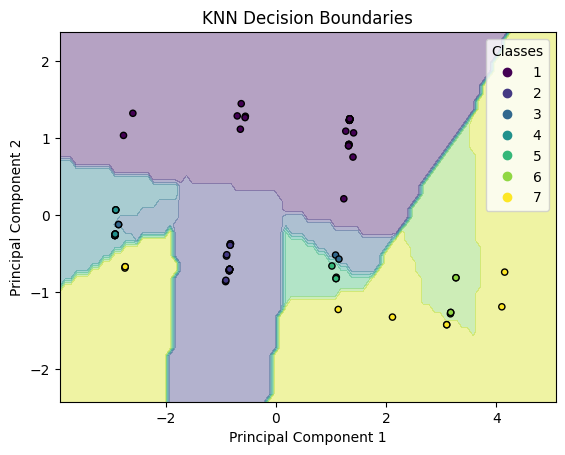

In [87]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Reduce the dataset to 2 dimensions using PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train the KNN model again on the reduced data
knn_pca = KNeighborsClassifier(n_neighbors=best_k, metric=best_metric)
knn_pca.fit(X_train_pca, y_train)

# Generate a mesh grid for plotting decision boundaries
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predict the decision boundary values
Z = knn_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.4)

# Plot the training points
scatter = plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, edgecolor='k', s=20)
plt.legend(*scatter.legend_elements(), title="Classes")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KNN Decision Boundaries')
plt.show()

## **Interview Questions:**

**1. What are the key hyperparameters in KNN?**    
**Ans.**
1.   **Number of Neighbors (k)**: The number of nearest neighbors to consider for classification or regression.
2.   **Distance Metric**: The method used to calculate the distance between points (e.g., Euclidean, Manhattan).
3.   **Weights**: How the distance between neighbors affects their contribution (uniform or distance-based).
4.   **Algorithm**: The algorithm used to compute nearest neighbors (e.g., brute force, KD-Tree, Ball-Tree).
5.   **Leaf Size**: Specific to KD-Tree and Ball-Tree algorithms, it controls the number of points at which to switch to brute-force search.


**2. What distance metrics can be used in KNN?**
**Ans.**
1.   **Euclidean Distance**: Measures the straight-line distance between two points in Euclidean space.
2.   **Manhattan Distance**: Also known as L1 distance, it sums the absolute differences between the coordinates of two points.
3.   **Minkowski Distance**: A generalization of Euclidean and Manhattan distances; it becomes Euclidean when the parameter 𝑝 = 2 and Manhattan when 𝑝 = 1.
4.   **Hamming Distance**: Used for categorical variables, it counts the number of positions at which the corresponding elements are different.